*** No CODEPAGE record, no encoding_override: will use 'ascii'
      X    Y
0   7.6  157
1   7.1  174
2   8.2  175
3   7.5  188
4   7.4  171
5   7.8  143
6   7.3  217
7   8.0  190
8   7.1  142
9   7.5  190
10  8.1  215
11  7.0  199
12  7.3  262
13  7.8  105
14  7.3  121
15  8.0   81
16  8.5   82
17  7.1  210
18  8.2  202
19  7.9  155
20  7.6  157
21  8.8  147
22  7.2  133
23  7.9   53
24  8.1   56
25  7.7  113
26  8.4   35
27  7.4  125
28  7.3   76
29  8.5   48
30  7.8  147
31  6.7  117
32  7.1  182
33  7.3   87
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       34 non-null     float64
 1   Y       34 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 672.0 bytes
None
[[0.12500664 0.25847285]
 [1.13696519 0.56778404]
 [1.08934361 0.58597881]
 [0.32739835 0.8225109 ]
 [0.52979006 0.51319971]
 [0.27977677 0.00374598]
 [0.73218177 1.3501594

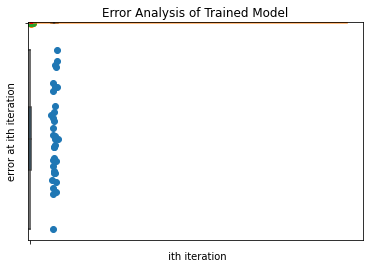

In [4]:
# STOCHASTIC GRADIENT DESCENT


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns

data = pd.read_excel(r"C:\Users\Krishnasai\unioncarbide.xls")
print(data)

print(data.info())

data.describe()

data.corr()

data.isnull().sum()

plt.scatter(data['X'],data['Y'])

# Outliers

from scipy import stats

z = np.abs(stats.zscore(data))
print(z)

sns.boxplot(x=data['X'])

sns.boxplot(y=data['Y'])

filter = data[(z < 3).all(axis=1)]
filter.head()

print(len(data))
print(len(filter))

#no outliers

# Normalisation Of Data

norm_data = data.copy()

norm_data = (norm_data - norm_data.min())/(norm_data.max() - norm_data.min())
print(norm_data.head())

# Splitting of Data into Training and Testing

data_train,data_test = train_test_split(norm_data,test_size=0.1)

print(data_train)

print(len(data_test))

data_x = np.array(data_train['X'])
data_y = np.array(data_train['Y'])
print(data_x)

#STEP 2: initialising required parameters
m = 1
c = -1
iter = 1
epochs = 100
alpha = 0.1
ns = len(data_train['X'])
error = []

# Calculating Gradient Descent
while (iter<=epochs):
  err = 0
  # running for loop to calculate and update model parameters for each sampleerr = 0
  for i in range(0,ns):

    # calculating error and storing in an list
    err +=  ((data_y[i] - (m * data_x[i]) - c))**2
    # calculating derivatives of m and c
    der_m = (-1) * ((data_y[i] - (m * data_x[i]) - c ))*(data_x[i])
    der_c = (-1) * (data_y[i] - (m * data_x[i]) - c )

    # calculating change in m and c
    change_m = (-1)*alpha*der_m
    change_c = (-1)*alpha*der_c

    #updating m and c
    m = m + change_m
    c = c + change_c

  #incrementing no of iterations
  iter = iter + 1
  err = (1/(2*len(data_train['X'])))*(err)
  error.append(err)
  
print(m,c)

# Mean Square Error Of Training Data

data_train_pred =  m*data_train['X'] + c

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(data_train['Y'],data_train_pred)
print(mse)

len(error)

data_train_x = np.array(data_train['X'])
data_train_y = np.array(data_train['Y'])
pred2 = []
for i in data_train_x:
    pred2.append(m*i + c)

plt.plot(data_train_x,pred2)
plt.scatter(data_train_x,data_train_y)

#Error Rate Analysis

iters = np.arange(epochs)
plt.plot(iters,error)
plt.title("Error Analysis of Trained Model")
plt.xlabel(" ith iteration")
plt.ylabel("error at ith iteration")
plt.grid()

# Mean Square Error Of Testing Data

data_test_pred = m*data_test['X'] + c
mse2 = mean_squared_error(data_test['Y'],data_test_pred)
print(mse2)

plt.scatter(data_test['X'],data_test['Y'])
plt.plot(data_test['X'],data_test_pred,'red')
plt.grid()

# Predicting Number of Bicarbonates in the well water by giving pH as input

# storing max and min values
min_x = data['X'].min()
max_x = data['X'].max()
min_y = data['Y'].min()
max_y = data['Y'].max()

input_x = float(input("enter the pH of well water:"))
input_xx = input_x
input_x = (input_x - min_x)/(max_x - min_x)
output_y = m*input_x + c
output_y = output_y*(max_y - min_y) + min_y
print("Total number of bicarbonates in well water having pH =",input_xx,"is",output_y)